In [6]:
import pandas as pd
from bench_data_import import import_data
from top50 import top50
import matplotlib.pyplot as plt

# Import the top 50 Raw lifters of all time by weight class and sex
df = top50()

# Create chart of average bodyweight, average bench and heaviest bench by weight class and sex
# Then calculate the relative strength and absolute & relative strength percent growth figures
sex_strength_comparisons = (
    df.groupby(["weightclass_lbs", "sex"])
        .agg(
            avg_bodyweight_lbs=("bodyweight_lbs", "mean"), 
            avg_bench_lbs=("bench_lbs", "mean"), 
            heaviest_bench=("bench_lbs", "max")
        )
        .assign(
            strength_ratio=lambda x: (x["avg_bench_lbs"] / x["avg_bodyweight_lbs"]), 
            absolute_strength_growth=lambda x: x.groupby("sex")["heaviest_bench"].pct_change().mul(100), 
            relative_strength_growth=lambda x: x.groupby("sex")["strength_ratio"].pct_change().mul(100)
        )
        .round(2)
)

sex_strength_comparisons

avg_bodyweight_lbs  avg_bench_lbs  heaviest_bench  \
weightclass_lbs    sex                                                      
148                F                145.80         302.17          341.72   
                   M                145.98         437.81          502.65   
165                F                161.89         310.94          363.76   
                   M                161.94         477.04          540.13   
181                F                188.36         325.45          380.30   
                   M                179.66         506.57          545.64   
198                F                193.33         320.33          402.34   
                   M                200.33         539.77          617.29   
220                F                211.96         285.94          369.27   
                   M                218.11         562.82          633.83   
242                M                237.75         589.32          672.41   
275                M                268.49         617.51          669.10   
308                M                297.03         634.89          705.48   
Super Heavy Weight F                273.69         345.12          457.46   
                   M                359.93         639.99          782.64   

                        strength_ratio  absolute_strength_growth  \
weightclass_lbs    sex                                             
148                F              2.07                       NaN   
                   M              3.00                       NaN   
165                F              1.92                      6.45   
                   M              2.95                      7.46   
181                F              1.73                      4.55   
                   M              2.82                      1.02   
198                F              1.66                      5.80   
                   M              2.69                     13.13   
220                F              1.35                     -8.22   
                   M              2.58                      2.68   
242                M              2.48                      6.09   
275                M              2.30                     -0.49   
308                M              2.14                      5.44   
Super Heavy Weight F              1.26                     23.88   
                   M              1.78                     10.94   

                        relative_strength_growth  
weightclass_lbs    sex                            
148                F                         NaN  
                   M                         NaN  
165                F                       -7.32  
                   M                       -1.78  
181                F                      -10.04  
                   M                       -4.28  
198                F                       -4.10  
                   M                       -4.44  
220                F                      -18.58  
                   M                       -4.23  
242                M                       -3.94  
275                M                       -7.21  
308                M                       -7.06  
Super Heavy Weight F                       -6.53  
                   M                      -16.81

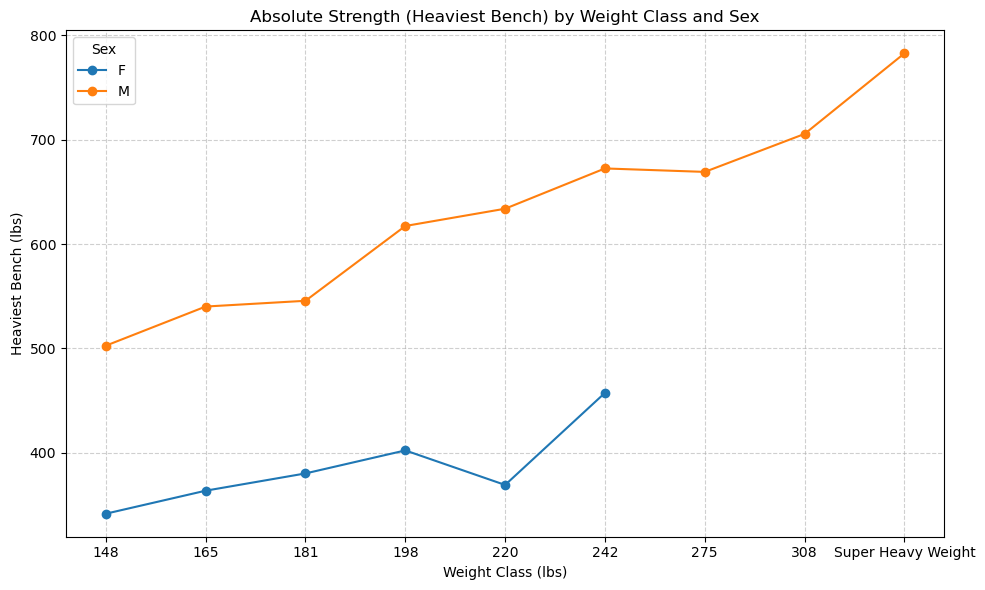

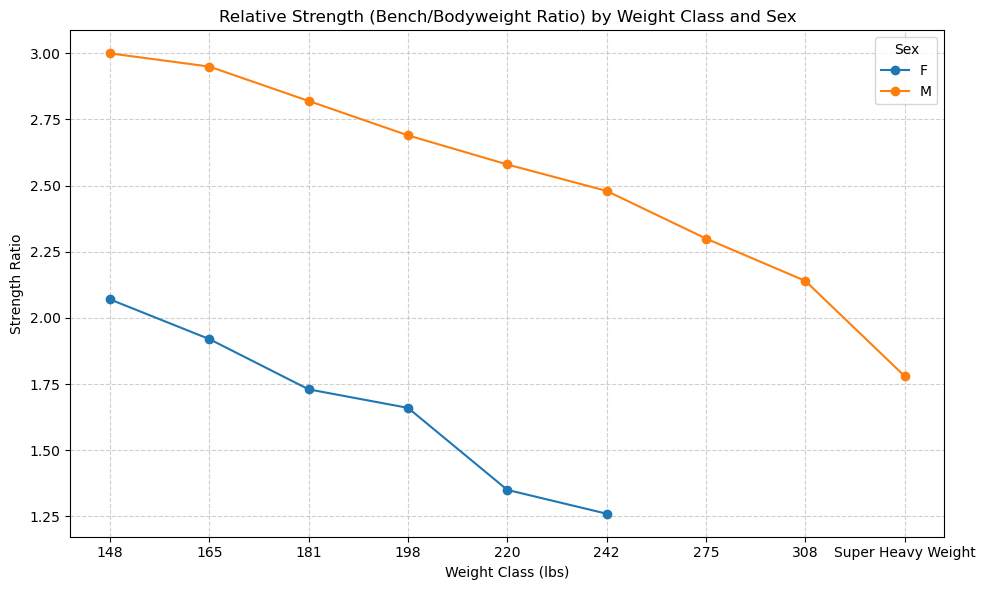

In [8]:
import matplotlib.pyplot as plt

# Reset index for plotting
plot_df = sex_strength_comparisons.reset_index()

# Helper function to numerically sort weight classes
def weightclass_sort_key(wc: str):
    wc = str(wc).strip()
    if wc.lower().startswith("super"):
        return 9999
    try:
        return float(wc.replace("+", "").split()[0])
    except ValueError:
        return 9999

# Sort by numeric weight class order
plot_df = plot_df.sort_values("weightclass_lbs", key=lambda x: x.map(weightclass_sort_key))
ordered_labels = sorted(plot_df["weightclass_lbs"].unique(), key=weightclass_sort_key)

# Reusable plotting function 
def plot_strength_metric(y_col, title, ylabel):
    plt.figure(figsize=(10,6))
    for sex, data in plot_df.groupby("sex"):
        plt.plot(range(len(data)), data[y_col], marker='o', label=sex)
    plt.xticks(ticks=range(len(ordered_labels)), labels=ordered_labels)
    plt.title(title)
    plt.xlabel("Weight Class (lbs)")
    plt.ylabel(ylabel)
    plt.legend(title="Sex")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Absolute Strength (Heaviest Bench)
plot_strength_metric(
    y_col="heaviest_bench",
    title="Absolute Strength (Heaviest Bench) by Weight Class and Sex",
    ylabel="Heaviest Bench (lbs)"
)

# Relative Strength (Bench-to-Bodyweight Ratio)
plot_strength_metric(
    y_col="strength_ratio",
    title="Relative Strength (Bench/Bodyweight Ratio) by Weight Class and Sex",
    ylabel="Strength Ratio"
)
